<a href="https://colab.research.google.com/github/HPractor/DiabetesPredictionUsingPSO/blob/main/PSO_DIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

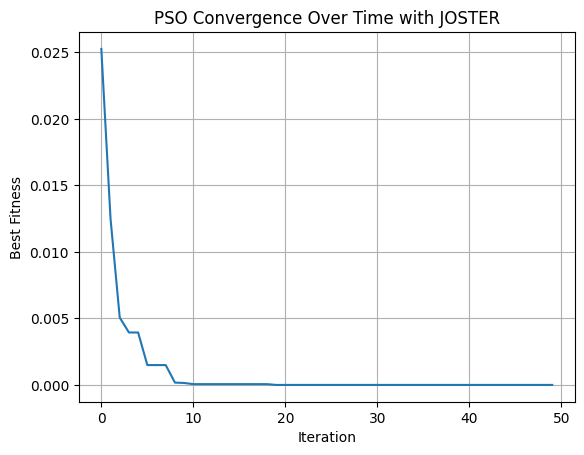

Best position: [ 0.00055614 -0.001717  ], Best fitness: 3.2573676370239077e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fitness_function(position):
    # Simple fitness function: Sphere function
    return np.sum(position**2)

def update_velocity(particle, personal_best, global_best, w, c1, c2):
    r1 = np.random.rand()
    r2 = np.random.rand()
    inertia = w * particle['velocity']
    cognitive = c1 * r1 * (personal_best - particle['position'])
    social = c2 * r2 * (global_best - particle['position'])
    new_velocity = inertia + cognitive + social
    return new_velocity

def apply_jump(particle, num_dimensions):
    # Reset position and velocity to random values
    particle['position'] = np.random.rand(num_dimensions)
    particle['velocity'] = np.random.rand(num_dimensions)

# PSO parameters
num_particles = 10
num_dimensions = 2
w = 0.5  # inertia weight
c1 = 1.5  # cognitive coefficient
c2 = 1.5  # social coefficient
max_iterations = 50
jump_interval = 10  # Apply jump every 10 iterations

# Initialize particles
particles = [{'position': np.random.rand(num_dimensions),
              'velocity': np.random.rand(num_dimensions),
              'best_position': None,
              'best_fitness': float('inf')} for _ in range(num_particles)]

global_best_position = None
global_best_fitness = float('inf')
best_fitness_over_time = []

# PSO loop
for iteration in range(max_iterations):
    for particle in particles:
        fitness = fitness_function(particle['position'])
        if fitness < particle['best_fitness']:
            particle['best_fitness'] = fitness
            particle['best_position'] = particle['position'].copy()
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particle['position'].copy()

    best_fitness_over_time.append(global_best_fitness)

    if iteration % jump_interval == 0:  # Apply jump mechanism
        for particle in particles:
            apply_jump(particle, num_dimensions)

    for particle in particles:
        particle['velocity'] = update_velocity(particle, particle['best_position'], global_best_position, w, c1, c2)
        particle['position'] += particle['velocity']

# Plot the convergence graph
plt.plot(best_fitness_over_time)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('PSO Convergence Over Time with JOSTER')
plt.grid(True)
plt.show()

print(f'Best position: {global_best_position}, Best fitness: {global_best_fitness}')


In [ ]:
!pip install pandas
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
a=pandas.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
import numpy as np

def fitness_function(position):
    # Define your fitness function here
    # For example, let's calculate the sum of squares of the position values
    return np.sum(position ** 2)  # Return a numerical fitness value

def update_velocity(particle, personal_best, global_best, w, c1, c2):
    r1 = np.random.rand()
    r2 = np.random.rand()
    inertia = w * particle['velocity']
    cognitive = c1 * r1 * (personal_best - particle['position'])
    social = c2 * r2 * (global_best - particle['position'])
    new_velocity = inertia + cognitive + social
    return new_velocity

def apply_jump(particle):
    # Define your jump mechanism here (e.g., reset velocity or position)
    pass

# PSO parameters
num_particles = 30
num_dimensions = 2
w = 0.5  # inertia weight
c1 = 1.5  # cognitive coefficient
c2 = 1.5  # social coefficient
max_iterations = 100

# Initialize particles
particles = [{'position': np.random.rand(num_dimensions),
              'velocity': np.random.rand(num_dimensions),
              'best_position': None,
              'best_fitness': float('inf')} for _ in range(num_particles)]

global_best_position = None
global_best_fitness = float('inf')

# PSO loop
for iteration in range(max_iterations):
    for particle in particles:
        fitness = fitness_function(particle['position'])
        if fitness < particle['best_fitness']:
            particle['best_fitness'] = fitness
            particle['best_position'] = particle['position']
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particle['position']

    if iteration % 10 == 0:  # Example of a condition to apply jump mechanism
        for particle in particles:
            apply_jump(particle)

    for particle in particles:
        particle['velocity'] = update_velocity(particle, particle['best_position'], global_best_position, w, c1, c2)
        particle['position'] += particle['velocity']

print(f'Best position: {global_best_position}, Best fitness: {global_best_fitness}')

Best position: [-0.7432921  -0.38013737], Best fitness: 0.0006680593834298889


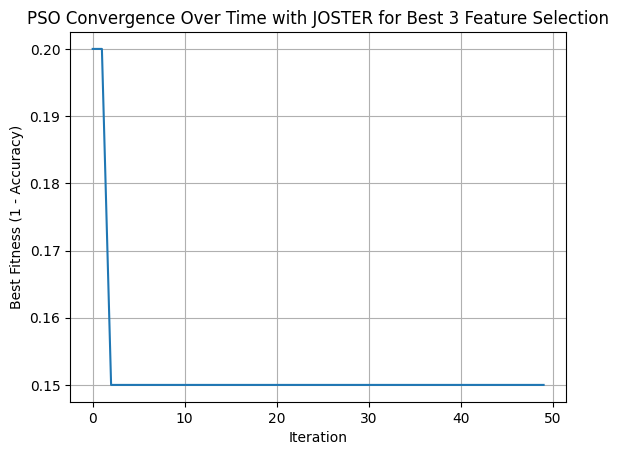

Best position (selected features): [0 0 1 1 0 0 0 1 0 0], Best fitness (1 - accuracy): 0.15000000000000002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def fitness_function(position, X_train, y_train, X_val, y_val):
    selected_features = np.where(position == 1)[0]
    if len(selected_features) != 3:
        return float('inf')

    model = LogisticRegression()
    model.fit(X_train[:, selected_features], y_train)
    predictions = model.predict(X_val[:, selected_features])
    accuracy = accuracy_score(y_val, predictions)
    return 1 - accuracy  # Minimize 1 - accuracy

def update_velocity(particle, personal_best, global_best, w, c1, c2):
    r1 = np.random.rand(particle['position'].shape[0])
    r2 = np.random.rand(particle['position'].shape[0])
    inertia = w * particle['velocity']
    cognitive = c1 * r1 * (personal_best - particle['position'])
    social = c2 * r2 * (global_best - particle['position'])
    new_velocity = inertia + cognitive + social
    return new_velocity

def apply_jump(particle, num_dimensions):
    particle['position'] = np.zeros(num_dimensions)
    indices = np.random.choice(num_dimensions, 3, replace=False)
    particle['position'][indices] = 1
    particle['velocity'] = np.random.rand(num_dimensions)

def binary_update_position(particle):
    sigmoid = 1 / (1 + np.exp(-particle['velocity']))
    particle['position'] = np.where(np.random.rand(particle['position'].shape[0]) < sigmoid, 1, 0)
    # Ensure exactly 3 features are selected
    if np.sum(particle['position']) != 3:
        indices = np.argsort(sigmoid)[-3:]
        particle['position'] = np.zeros_like(particle['position'])
        particle['position'][indices] = 1

# Generate a dummy dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# PSO parameters
num_particles = 10
num_dimensions = X.shape[1]
w = 0.5  # inertia weight
c1 = 1.5  # cognitive coefficient
c2 = 1.5  # social coefficient
max_iterations = 50
jump_interval = 10  # Apply jump every 10 iterations

# Initialize particles
particles = [{'position': np.zeros(num_dimensions),
              'velocity': np.random.rand(num_dimensions),
              'best_position': None,
              'best_fitness': float('inf')} for _ in range(num_particles)]

for particle in particles:
    indices = np.random.choice(num_dimensions, 3, replace=False)
    particle['position'][indices] = 1

global_best_position = None
global_best_fitness = float('inf')
best_fitness_over_time = []

# PSO loop
for iteration in range(max_iterations):
    for particle in particles:
        fitness = fitness_function(particle['position'], X_train, y_train, X_val, y_val)
        if fitness < particle['best_fitness']:
            particle['best_fitness'] = fitness
            particle['best_position'] = particle['position'].copy()
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particle['position'].copy()

    best_fitness_over_time.append(global_best_fitness)

    if iteration % jump_interval == 0:  # Apply jump mechanism
        for particle in particles:
            apply_jump(particle, num_dimensions)

    for particle in particles:
        particle['velocity'] = update_velocity(particle, particle['best_position'], global_best_position, w, c1, c2)
        binary_update_position(particle)

# Plot the convergence graph
plt.plot(best_fitness_over_time)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness (1 - Accuracy)')
plt.title('PSO Convergence Over Time with JOSTER for Best 3 Feature Selection')
plt.grid(True)
plt.show()

print(f'Best position (selected features): {global_best_position}, Best fitness (1 - accuracy): {global_best_fitness}')


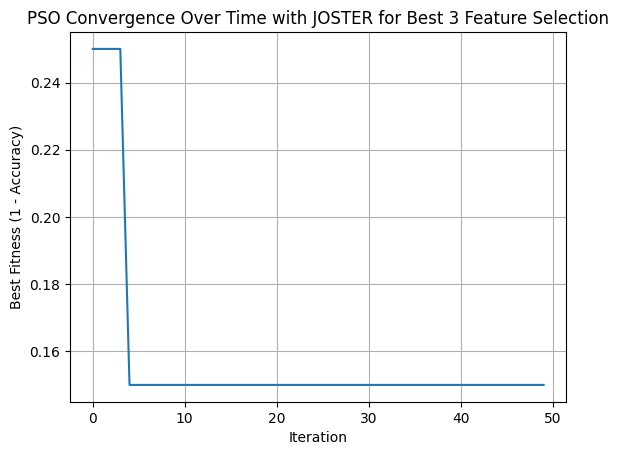

Best position (selected features): [2 6 7], Best fitness (1 - accuracy): 0.15000000000000002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def fitness_function(position, X_train, y_train, X_val, y_val):
    selected_features = np.where(position == 1)[0]
    if len(selected_features) != 3:
        return float('inf')

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[:, selected_features], y_train)
    predictions = model.predict(X_val[:, selected_features])
    accuracy = accuracy_score(y_val, predictions)
    return 1 - accuracy  # Minimize 1 - accuracy

def update_velocity(particle, personal_best, global_best, w, c1, c2):
    r1 = np.random.rand(particle['position'].shape[0])
    r2 = np.random.rand(particle['position'].shape[0])
    inertia = w * particle['velocity']
    cognitive = c1 * r1 * (personal_best - particle['position'])
    social = c2 * r2 * (global_best - particle['position'])
    new_velocity = inertia + cognitive + social
    return new_velocity

def apply_jump(particle, num_dimensions):
    particle['position'] = np.zeros(num_dimensions)
    indices = np.random.choice(num_dimensions, 3, replace=False)
    particle['position'][indices] = 1
    particle['velocity'] = np.random.rand(num_dimensions)

def binary_update_position(particle):
    sigmoid = 1 / (1 + np.exp(-particle['velocity']))
    particle['position'] = np.where(np.random.rand(particle['position'].shape[0]) < sigmoid, 1, 0)
    if np.sum(particle['position']) != 3:
        indices = np.argsort(sigmoid)[-3:]
        particle['position'] = np.zeros_like(particle['position'])
        particle['position'][indices] = 1

# Generate a dummy dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# PSO parameters
num_particles = 10
num_dimensions = X.shape[1]
w = 0.5  # inertia weight
c1 = 1.5  # cognitive coefficient
c2 = 1.5  # social coefficient
max_iterations = 50
jump_interval = 10  # Apply jump every 10 iterations

# Initialize particles
particles = [{'position': np.zeros(num_dimensions),
              'velocity': np.random.rand(num_dimensions),
              'best_position': None,
              'best_fitness': float('inf')} for _ in range(num_particles)]

for particle in particles:
    indices = np.random.choice(num_dimensions, 3, replace=False)
    particle['position'][indices] = 1

global_best_position = None
global_best_fitness = float('inf')
best_fitness_over_time = []

# PSO loop
for iteration in range(max_iterations):
    for particle in particles:
        fitness = fitness_function(particle['position'], X_train, y_train, X_val, y_val)
        if fitness < particle['best_fitness']:
            particle['best_fitness'] = fitness
            particle['best_position'] = particle['position'].copy()
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particle['position'].copy()

    best_fitness_over_time.append(global_best_fitness)

    if iteration % jump_interval == 0:  # Apply jump mechanism
        for particle in particles:
            apply_jump(particle, num_dimensions)

    for particle in particles:
        particle['velocity'] = update_velocity(particle, particle['best_position'], global_best_position, w, c1, c2)
        binary_update_position(particle)

# Plot the convergence graph
plt.plot(best_fitness_over_time)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness (1 - Accuracy)')
plt.title('PSO Convergence Over Time with JOSTER for Best 3 Feature Selection')
plt.grid(True)
plt.show()

selected_features = np.where(global_best_position == 1)[0]
print(f'Best position (selected features): {selected_features}, Best fitness (1 - accuracy): {global_best_fitness}')



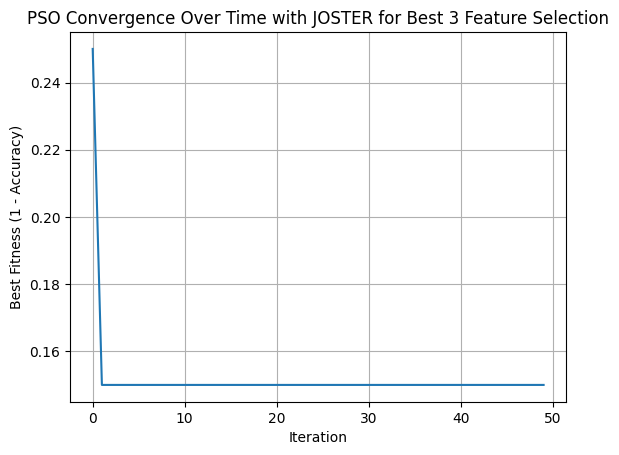

Best position (selected features): ['Feature_0', 'Feature_2', 'Feature_7'], Best fitness (1 - accuracy): 0.15000000000000002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a dataset with named features
def create_named_dataset(n_samples, n_features, n_informative, n_redundant, random_state=42):
    X, y = make_classification(n_samples=n_samples, n_features=n_features,
                               n_informative=n_informative, n_redundant=n_redundant, random_state=random_state)
    feature_names = [f'Feature_{i}' for i in range(n_features)]
    return X, y, feature_names

def fitness_function(position, X_train, y_train, X_val, y_val):
    selected_features = np.where(position == 1)[0]
    if len(selected_features) != 3:
        return float('inf')

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[:, selected_features], y_train)
    predictions = model.predict(X_val[:, selected_features])
    accuracy = accuracy_score(y_val, predictions)
    return 1 - accuracy  # Minimize 1 - accuracy

def update_velocity(particle, personal_best, global_best, w, c1, c2):
    r1 = np.random.rand(particle['position'].shape[0])
    r2 = np.random.rand(particle['position'].shape[0])
    inertia = w * particle['velocity']
    cognitive = c1 * r1 * (personal_best - particle['position'])
    social = c2 * r2 * (global_best - particle['position'])
    new_velocity = inertia + cognitive + social
    return new_velocity

def apply_jump(particle, num_dimensions):
    particle['position'] = np.zeros(num_dimensions)
    indices = np.random.choice(num_dimensions, 3, replace=False)
    particle['position'][indices] = 1
    particle['velocity'] = np.random.rand(num_dimensions)

def binary_update_position(particle):
    sigmoid = 1 / (1 + np.exp(-particle['velocity']))
    particle['position'] = np.where(np.random.rand(particle['position'].shape[0]) < sigmoid, 1, 0)
    if np.sum(particle['position']) != 3:
        indices = np.argsort(sigmoid)[-3:]
        particle['position'] = np.zeros_like(particle['position'])
        particle['position'][indices] = 1

# Generate a dummy dataset with named features
X, y, feature_names = create_named_dataset(n_samples=100, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# PSO parameters
num_particles = 10
num_dimensions = X.shape[1]
w = 0.5  # inertia weight
c1 = 1.5  # cognitive coefficient
c2 = 1.5  # social coefficient
max_iterations = 50
jump_interval = 10  # Apply jump every 10 iterations

# Initialize particles
particles = [{'position': np.zeros(num_dimensions),
              'velocity': np.random.rand(num_dimensions),
              'best_position': None,
              'best_fitness': float('inf')} for _ in range(num_particles)]

for particle in particles:
    indices = np.random.choice(num_dimensions, 3, replace=False)
    particle['position'][indices] = 1

global_best_position = None
global_best_fitness = float('inf')
best_fitness_over_time = []

# PSO loop
for iteration in range(max_iterations):
    for particle in particles:
        fitness = fitness_function(particle['position'], X_train, y_train, X_val, y_val)
        if fitness < particle['best_fitness']:
            particle['best_fitness'] = fitness
            particle['best_position'] = particle['position'].copy()
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particle['position'].copy()

    best_fitness_over_time.append(global_best_fitness)

    if iteration % jump_interval == 0:  # Apply jump mechanism
        for particle in particles:
            apply_jump(particle, num_dimensions)

    for particle in particles:
        particle['velocity'] = update_velocity(particle, particle['best_position'], global_best_position, w, c1, c2)
        binary_update_position(particle)

# Plot the convergence graph
plt.plot(best_fitness_over_time)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness (1 - Accuracy)')
plt.title('PSO Convergence Over Time with JOSTER for Best 3 Feature Selection')
plt.grid(True)
plt.show()

selected_features = np.where(global_best_position == 1)[0]
selected_feature_names = [feature_names[i] for i in selected_features]
print(f'Best position (selected features): {selected_feature_names}, Best fitness (1 - accuracy): {global_best_fitness}')


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def fitness_function(chromosome, X_train, y_train, X_val, y_val):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) == 0:
        return 0  # Penalize empty feature set
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[:, selected_features], y_train)
    predictions = model.predict(X_val[:, selected_features])
    accuracy = accuracy_score(y_val, predictions)
    return accuracy

def crossover(parent1, parent2):
    point = np.random.randint(len(parent1))
    offspring1 = np.concatenate((parent1[:point], parent2[point:]))
    offspring2 = np.concatenate((parent2[:point], parent1[point:]))
    return offspring1, offspring2

def mutate(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

def genetic_algorithm(X_train, y_train, X_val, y_val, num_features, num_generations, population_size, mutation_rate):
    # Initialize population
    population = np.random.randint(2, size=(population_size, num_features))

    for generation in range(num_generations):
        # Evaluate fitness
        fitness_scores = np.array([fitness_function(individual, X_train, y_train, X_val, y_val) for individual in population])

        # Select parents
        parents_indices = np.argsort(fitness_scores)[-population_size//2:]
        parents = population[parents_indices]

        # Generate offspring
        offspring = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i+1]
            child1, child2 = crossover(parent1, parent2)
            offspring.append(mutate(child1, mutation_rate))
            offspring.append(mutate(child2, mutation_rate))

        offspring = np.array(offspring)

        # Create new population
        population[:len(parents)] = parents
        population[len(parents):] = offspring

    # Find the best solution
    fitness_scores = np.array([fitness_function(individual, X_train, y_train, X_val, y_val) for individual in population])
    best_index = np.argmax(fitness_scores)
    best_features = population[best_index]

    return best_features, fitness_scores[best_index]

# Generate a dummy dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters
num_features = X.shape[1]
num_generations = 50
population_size = 20
mutation_rate = 0.1

best_features, best_fitness = genetic_algorithm(X_train, y_train, X_val, y_val, num_features, num_generations, population_size, mutation_rate)

selected_features = np.where(best_features == 1)[0]
print(f'Selected features: {selected_features}, Best fitness (accuracy): {best_fitness}')


Selected features: [1 2 3 4 5 7 8 9], Best fitness (accuracy): 0.9


Selected features: ['Feature 0', 'Feature 2', 'Feature 7'], Best fitness (accuracy): 0.85


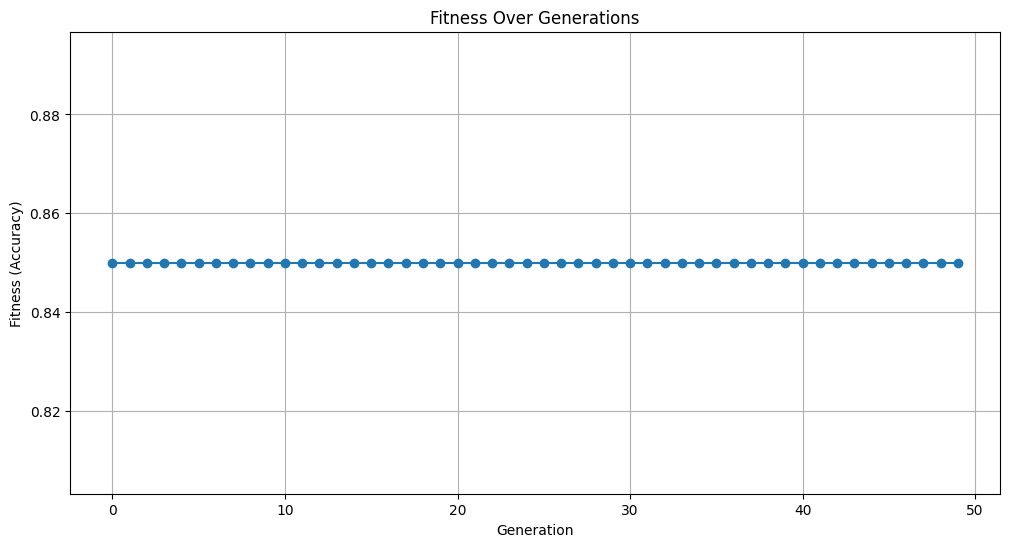

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def fitness_function(chromosome, X_train, y_train, X_val, y_val):
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) != 3:
        return 0  # Penalize if not exactly 3 features are selected
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[:, selected_features], y_train)
    predictions = model.predict(X_val[:, selected_features])
    accuracy = accuracy_score(y_val, predictions)
    return accuracy

def initialize_population(num_individuals, num_features):
    population = np.zeros((num_individuals, num_features), dtype=int)
    for i in range(num_individuals):
        indices = np.random.choice(num_features, 3, replace=False)
        population[i, indices] = 1
    return population

def crossover(parent1, parent2):
    point = np.random.randint(len(parent1))
    offspring1 = np.concatenate((parent1[:point], parent2[point:]))
    offspring2 = np.concatenate((parent2[:point], parent1[point:]))
    return correct_chromosome(offspring1), correct_chromosome(offspring2)

def mutate(chromosome, mutation_rate):
    num_features = len(chromosome)
    for _ in range(int(num_features * mutation_rate)):
        index = np.random.randint(num_features)
        if chromosome[index] == 1:
            chromosome[index] = 0
        else:
            if np.sum(chromosome) < 3:
                chromosome[index] = 1
    return correct_chromosome(chromosome)

def correct_chromosome(chromosome):
    num_features = len(chromosome)
    selected_features = np.where(chromosome == 1)[0]
    if len(selected_features) > 3:
        to_remove = len(selected_features) - 3
        indices_to_remove = np.random.choice(selected_features, to_remove, replace=False)
        chromosome[indices_to_remove] = 0
    elif len(selected_features) < 3:
        to_add = 3 - len(selected_features)
        indices_to_add = np.random.choice(np.where(chromosome == 0)[0], to_add, replace=False)
        chromosome[indices_to_add] = 1
    return chromosome

def genetic_algorithm(X_train, y_train, X_val, y_val, num_features, num_generations, population_size, mutation_rate):
    population = initialize_population(population_size, num_features)
    fitness_history = []

    for generation in range(num_generations):
        fitness_scores = np.array([fitness_function(individual, X_train, y_train, X_val, y_val) for individual in population])
        fitness_history.append(np.max(fitness_scores))

        # Select parents
        parents_indices = np.argsort(fitness_scores)[-population_size//2:]
        parents = population[parents_indices]

        # Generate offspring
        offspring = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i+1]
            child1, child2 = crossover(parent1, parent2)
            offspring.append(mutate(child1, mutation_rate))
            offspring.append(mutate(child2, mutation_rate))

        offspring = np.array(offspring)

        # Create new population
        population[:len(parents)] = parents
        population[len(parents):] = offspring

    # Find the best solution
    fitness_scores = np.array([fitness_function(individual, X_train, y_train, X_val, y_val) for individual in population])
    best_index = np.argmax(fitness_scores)
    best_features = population[best_index]

    return best_features, fitness_scores[best_index], fitness_history

# Generate a dummy dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters
num_features = X.shape[1]
num_generations = 50
population_size = 20
mutation_rate = 0.1

best_features, best_fitness, fitness_history = genetic_algorithm(X_train, y_train, X_val, y_val, num_features, num_generations, population_size, mutation_rate)

selected_features = np.where(best_features == 1)[0]
selected_feature_names = [feature_names[i] for i in selected_features]

print(f'Selected features: {selected_feature_names}, Best fitness (accuracy): {best_fitness}')

# Plot fitness over generations
plt.figure(figsize=(12, 6))
plt.plot(fitness_history, marker='o')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness (Accuracy)')
plt.grid(True)
plt.show()
